In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [0]:
def loadImage(image):
  img = cv2.imread(image,0)
  #cv2_imshow(img)
  #print(type(img))
  return img

In [0]:
def padding(arr,top,bottom,left,right):
  xlen = arr.shape[0]+2*left
  ylen = arr.shape[1]+2*top
  new = np.zeros([xlen,ylen],dtype=int)
  new[left:arr.shape[0]+left,top:arr.shape[1]+top] = arr
  new1 = np.array(new)
  #print(new1)
  #print(type(new1))
  return new1

In [0]:
def convol(arr,kernel):
  top = bottom = (kernel.shape[1] // 2)
  left = right = (kernel.shape[0] // 2)
  newImg = padding(arr,top,bottom,left,right)
  result = np.zeros_like(newImg)
  offset_x,offset_y = kernel.shape[1],kernel.shape[0]
  for x in range(arr.shape[1]):
    for y in range(arr.shape[0]): 
      result[y, x]=(kernel * newImg[y: y+offset_y, x: x+offset_x]).sum()
      
      
  return result


In [0]:
arr = loadImage('image_2.png')

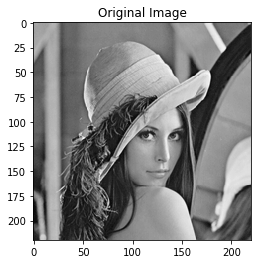

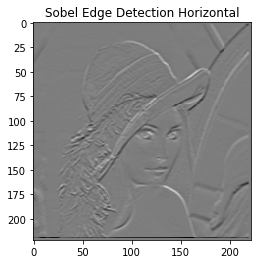

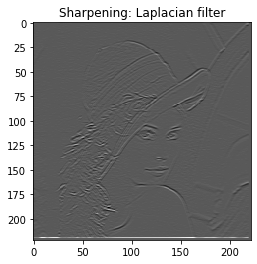

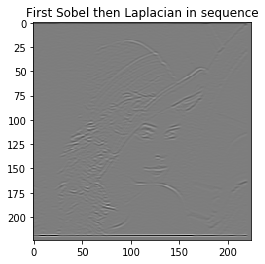

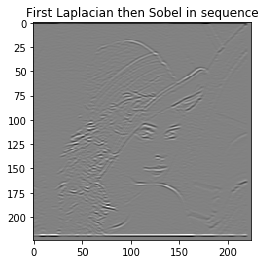

In [12]:
#Sharpening Filter
sobelH = np.matrix([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
conImg1 = convol(arr,sobelH)

#Edge detection Filter - Laplacian Mask
edge = np.matrix([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])  
conImg3 = convol(arr,edge)

#Sobel and Laplacian in sequence
conImg4 = convol(conImg1,edge)

#Laplacian and Sobel in sequence
conImg2 = convol(conImg3,sobelH)

plt.title('Original Image')
plt.imshow(arr, cmap='gray')
plt.show()

plt.title('Sobel Edge Detection Horizontal')
plt.imshow(conImg1, cmap='gray')
plt.show()

plt.title('Sharpening: Laplacian filter')
plt.imshow(conImg3, cmap='gray')
plt.show()

plt.title('First Sobel then Laplacian in sequence')
plt.imshow(conImg4, cmap='gray')
plt.show()

plt.title('First Laplacian then Sobel in sequence')
plt.imshow(conImg2, cmap='gray')
plt.show()